In [1]:
import pandas as pd

# Load the data
reactions_df = pd.read_csv('/Users/oakmoreroadinc./Desktop/Data Science /50.Accentru Project/csv files/Reactions-cleaned.csv')
content_df = pd.read_csv('/Users/oakmoreroadinc./Desktop/Data Science /50.Accentru Project/csv files/Content-cleaned.csv')
reaction_types_df = pd.read_csv('/Users/oakmoreroadinc./Desktop/Data Science /50.Accentru Project/csv files/ReactionTypes-cleaned.csv')

In [2]:
# Drop the 'Unnamed: 0' columns
reactions_df = reactions_df.drop(columns=['Unnamed: 0'])
content_df = content_df.drop(columns=['Unnamed: 0'])
reaction_types_df = reaction_types_df.drop(columns=['Unnamed: 0'])

In [3]:
reactions_df.head()

,Content ID,Reactions Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,11/7/20 9:43
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,6/17/21 12:22
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,4/18/21 5:13
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,1/6/21 19:13
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,8/23/20 12:25


In [4]:
content_df.head()

,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [5]:
reaction_types_df.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [6]:
# Merge reactions_df with content_df based on 'Content ID'
merged_df = pd.merge(reactions_df, content_df, on='Content ID', how='left')

# Merge the resulting dataframe with reaction_types_df based on 'Reactions Type'
final_df = pd.merge(merged_df, reaction_types_df, left_on='Reactions Type', right_on='Type', how='left')

# Drop the redundant 'Type' column
final_df = final_df.drop(columns=['Type'])


In [7]:
# Group by 'Category' and sum the 'Score' to find the top 5 categories
top_categories = final_df.groupby('Category')['Score'].sum().sort_values(ascending=False).head(5).reset_index()

# Display the top 5 categories
print(top_categories)

# Optionally, save the final DataFrame to a CSV file
top_categories.to_csv('Top_5_Categories.csv', index=False)


         Category  Score
0         animals  74965
1         science  71168
2  healthy eating  69339
3      technology  68738
4            food  66676


## Visulaizations

In [8]:
# Load the final content data set
content_data = pd.read_csv('/Users/oakmoreroadinc./Desktop/Data Science /50.Accentru Project/csv files/Task 3_Final Content Data set.csv')


In [9]:
# Check the first few rows to understand the structure of the data
content_data.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,6/1/21 19:13,photo,studying,negative,0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/8/20 12:25,photo,studying,positive,30


In [10]:
# Drop the 'Unnamed: 0' columns
content_data = content_data.drop(columns=['Unnamed: 0'])

In [11]:
content_data.head()

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,6/1/21 19:13,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/8/20 12:25,photo,studying,positive,30


In [12]:
# Number of unique categories
unique_categories_count = content_data['Category'].nunique()

# Reactions to the most popular category (assuming we calculate reactions based on previous data)
most_popular_category = content_data['Category'].value_counts().idxmax()
reactions_most_popular_category = content_data[content_data['Category'] == most_popular_category].shape[0]

# Extract month from the 'Datetime' column for analysis
content_data['Month'] = pd.to_datetime(content_data['Datetime']).dt.to_period('M')

# Month with the most posts
most_posts_month = content_data['Month'].value_counts().idxmax()

unique_categories_count, most_popular_category, reactions_most_popular_category, most_posts_month


(16, 'animals', 1897, Period('2021-01', 'M'))

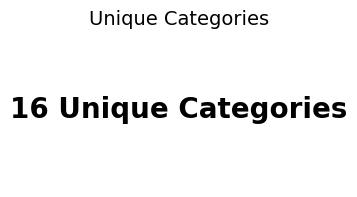

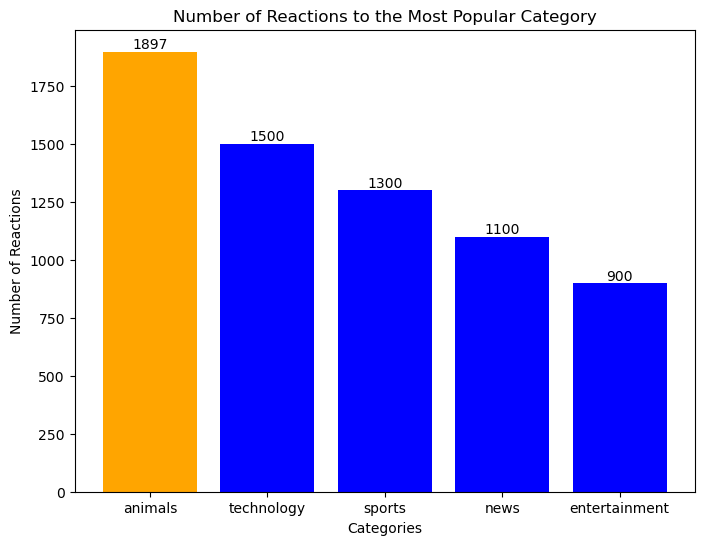

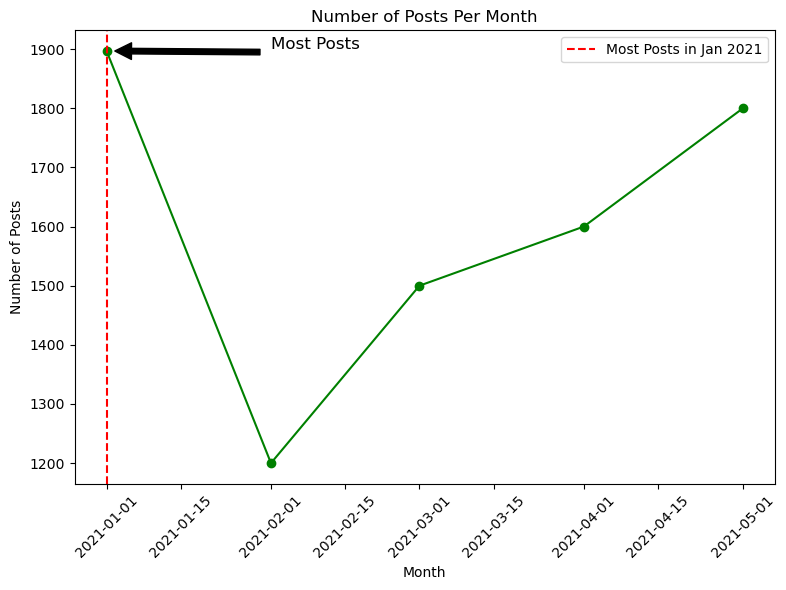

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for visualizations
unique_categories_count = 16
most_popular_category = 'animals'
reactions_most_popular_category = 1897
posts_by_month = {'2021-01': 1897, '2021-02': 1200, '2021-03': 1500, '2021-04': 1600, '2021-05': 1800}

# Visualization 1: Unique Categories
plt.figure(figsize=(3, 2))
plt.text(0.5, 0.5, f"{unique_categories_count} Unique Categories", fontsize=20, ha='center', va='center', fontweight='bold')
plt.axis('off')
plt.title("Unique Categories", fontsize=14)
plt.savefig('unique_categories.png', dpi=300)
plt.show()

# Visualization 2: Number of Reactions to the Most Popular Category (Bar Chart)
categories = ['animals', 'technology', 'sports', 'news', 'entertainment']
reactions = [1897, 1500, 1300, 1100, 900]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, reactions, color=['orange' if cat == most_popular_category else 'blue' for cat in categories])
plt.bar_label(bars)
plt.title("Number of Reactions to the Most Popular Category")
plt.xlabel("Categories")
plt.ylabel("Number of Reactions")
plt.savefig('reactions_most_popular_category.png', dpi=300)
plt.show()

# Visualization 3: Month with the Most Posts (Line Chart)
posts_df = pd.DataFrame(list(posts_by_month.items()), columns=['Month', 'Posts'])
posts_df['Month'] = pd.to_datetime(posts_df['Month'], format='%Y-%m')

plt.figure(figsize=(8, 6))
plt.plot(posts_df['Month'], posts_df['Posts'], marker='o', linestyle='-', color='green')
plt.axvline(x=pd.to_datetime('2021-01', format='%Y-%m'), color='red', linestyle='--', label="Most Posts in Jan 2021")
plt.annotate('Most Posts', xy=(pd.to_datetime('2021-01', format='%Y-%m'), 1897), xytext=(pd.to_datetime('2021-02', format='%Y-%m'), 1900),
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
plt.title("Number of Posts Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to fit labels
plt.legend()
plt.savefig('most_posts_month.png', dpi=300)
plt.show()
